In [0]:
!pip install -U -q PyDrive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, utils, svm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
# Load Libs for Google Collab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
# Authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
listed = drive.ListFile({'q': "title contains '.csv' and 'XXX' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))
  
X_downloaded = drive.CreateFile({'id': 'XXX',
                                'parents': 'XXX'})
X_downloaded.GetContentFile('X.csv')
y_downloaded = drive.CreateFile({'id': 'XXX',
                                'parents': 'XXX'})
y_downloaded.GetContentFile('y.csv')


title final_gps.csv, id 1xvb7fXI3tljcmQHpLL-zFN_sy5tZudT0
title y.csv, id 1XllzfPQjn0fRIAYaeaHNthW4Bse34vHQ
title X.csv, id 1gu40JLV4--waNeEhFuMrSjo4pcLZQHLG
title dataset_resampled.csv, id 11JrgqGJ3fZBjPxnOln3XP-_Zyy9_Oltd
title gps_resampled.csv, id 1ZlRhPOcKzvozDuegHqeZADttUCyy0yk7
title Magnetometer_resampled.csv, id 1N99JLcBTlyMA3EvBwPOJRvwFEbRFjujA
title Gyroscope_resampled.csv, id 11TMVVqvzqQqWPL75bA6ivBdmSiYh60Kn
title Accelerometer_resampled.csv, id 12i3VsbCgJbXfwZ6JM5pPXzDnPMJZhg9R
title y_test.csv, id 1RHr926Y4B8AYscEosY5oM9-odRjym5I8
title y_train.csv, id 1JYgOsx258fyTy0IZRX5-5IphR4anUglE
title final_gyr.csv, id 12t2rFXZAdVdj-KhhQcD6HETm2j4o_o9G
title final_mag.csv, id 1scKZyWvepwgtoBo1jj9SsvAWLZk9VqZk
title X_test.csv, id 1V_UGsG1wQMjfE-gBIxibreN23dnV7M6b
title X_train.csv, id 1Nvn2kvxeVALss3kFzph7CwPI4lnqRoIf
title final_acc.csv, id 1QzQmjP7KzB6DGn0zlbjoRt8oc1-dkEWY
title gps_filtered.csv, id 1Vi6PK8pyqT4pa8hBJ3sCApNq0zdLowl_


In [0]:
X = pd.read_csv('X.csv', sep='\t', decimal=',', encoding='utf-8', index_col=0)
y = pd.read_csv('y.csv', sep='\t', decimal=',', encoding='utf-8', index_col=0)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=52)

In [0]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

91493 91493
22874 22874


In [0]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

Cs = np.logspace(0, 3, 4)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = 10, verbose=3, n_jobs = -1)
clf.fit(X_train.values, y_train.values.flatten())

print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] C=1.0, kernel=rbf ...............................................
[CV] C=1.0, kernel=rbf ...............................................
[CV] ...................... C=1.0, kernel=rbf, score=0.758413 -12.5min
[CV] C=1.0, kernel=rbf ...............................................
[CV] ...................... C=1.0, kernel=rbf, score=0.770760 -12.5min
[CV] C=1.0, kernel=rbf ...............................................
[CV] ...................... C=1.0, kernel=rbf, score=0.761338 -12.5min
[CV] C=1.0, kernel=rbf ...............................................
[CV] ...................... C=1.0, kernel=rbf, score=0.766499 -12.6min
[CV] C=1.0, kernel=rbf ...............................................
[CV] ...................... C=1.0, kernel=rbf, score=0.760984 -12.4min
[CV] C=1.0, kernel=rbf ...............................................
[CV] ...................... C=1.0, kernel=rbf, score=0.762243 -12.3min
[CV] C=1.0, kern

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 134.4min


[CV] .................... C=100.0, kernel=rbf, score=0.869779 - 7.0min
[CV] C=1000.0, kernel=rbf ............................................
[CV] .................... C=100.0, kernel=rbf, score=0.871091 - 6.9min
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................... C=1000.0, kernel=rbf, score=0.916193 - 5.4min
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................... C=1000.0, kernel=rbf, score=0.924716 - 5.4min
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................... C=1000.0, kernel=rbf, score=0.917823 - 5.4min
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................... C=1000.0, kernel=rbf, score=0.915210 - 5.6min
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................... C=1000.0, kernel=rbf, score=0.914645 - 5.7min
[CV] C=1000.0, kernel=rbf ............................................
[CV] .

KeyboardInterrupt: ignored

In [0]:
print(clf.best_params_)
print("Accuracy on training data: ", clf.best_score_*100,'%')
print("Accuracy on testing data: ", clf.score(X_test, y_test)*100, '%')

{'C': 1000.0, 'kernel': 'rbf'}
Accuracy on training data:  91.2416818358151 %
Accuracy on testing data:  91.45380759131058 %


In [0]:
print(len(y_test.values.flatten()))
print(len(X_test))

8378
8378


8378
Index(['Bike', 'Car', 'Jogging', 'Metro', 'Tram', 'Train', 'Walking'], dtype='object')


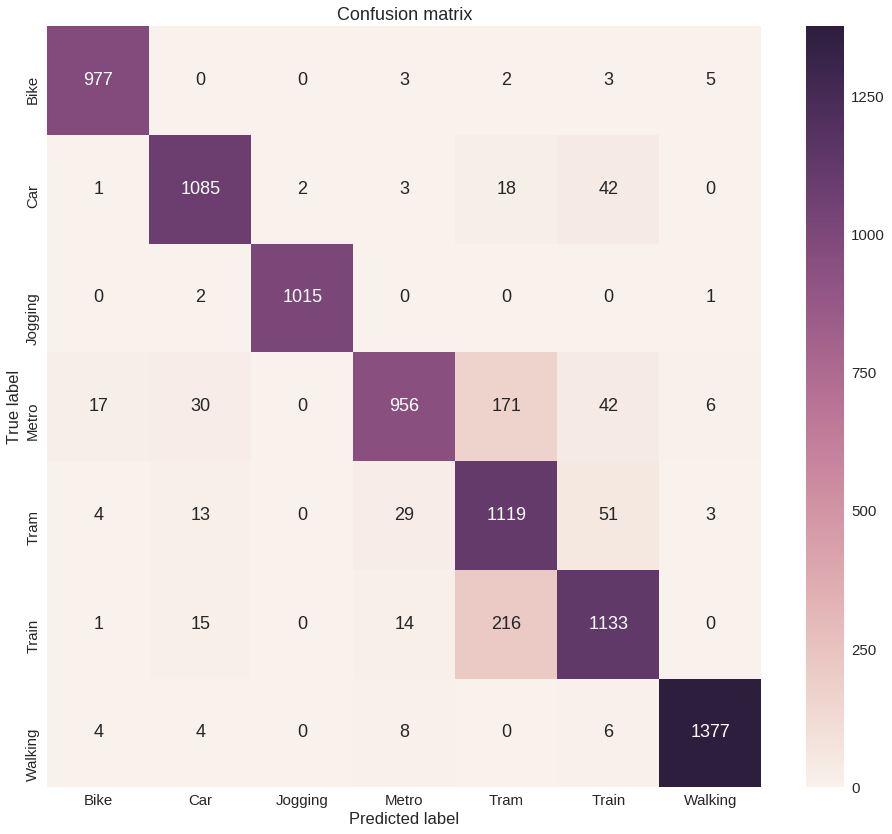

In [0]:
LABELS = ['Bike', 'Car', 'Jogging', 'Metro', 'Tram', 'Train', 'Walking', 'ALL']
labels = ['Bike', 'Car', 'Jogging', 'Metro', 'Tram', 'Train', 'Walking']
sn.set(style='whitegrid', palette='muted', font_scale=1.5)
print(len(y_test.values.flatten()))

crosstab = pd.crosstab(y_test.values.flatten(), clf.predict(X_test),
                      rownames=['True'], colnames=['Predicted'],
                      margins=True)
crosstab.columns = LABELS
crosstab.index = LABELS
crosstab = crosstab.drop('ALL', axis=1).drop('ALL', axis=0)

print(crosstab.columns)

plt.figure(figsize=(16, 14))
sn.heatmap(crosstab, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();


In [0]:

clf_binary = GridSearchCV(estimator = svc, param_grid = parameters, cv = 5, n_jobs = -1)
clf_binary.fit(X_train.values, y_train.walking_flag.values.flatten())

print(clf_binary.best_params_)
print(clf_binary.best_score_)

NameError: ignored

In [0]:
crosstab_binary = pd.crosstab(y_test.walking_flag.values.flatten(), clf_binary.predict(x_test), 
                             rownames=['True'], colnames=['Predicted'],
                             margins=True)
crosstab_binary

In [0]:
from sklearn.svm import LinearSVC
from sklearn.learning_curve import validation_curve

clf_svc = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    clf_svc, X_train.values, y_train.values.flatten(),
    param_name = "C", param_range = Cs,
    cv = 5, scoring = "accuracy", n_jobs = -1)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



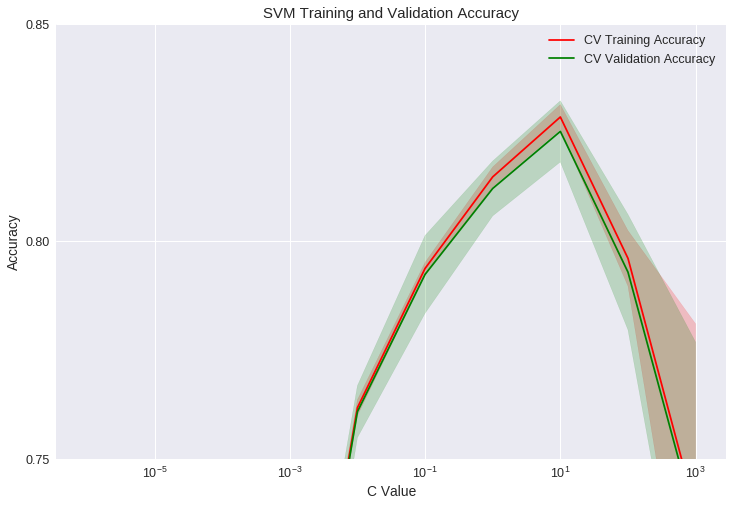

In [0]:
y_min = 0.75
y_max = 0.85

sn.set(font_scale = 1.25)
sn.set_style("darkgrid")
f = plt.figure(figsize = (12,8))
ax = plt.axes()
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")

plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(Cs, train_scores_mean, label = "CV Training Accuracy", color = "red")
plt.fill_between(Cs, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha = 0.2, color = "red")
plt.semilogx(Cs, test_scores_mean, label = "CV Validation Accuracy", color = "green")
plt.fill_between(Cs, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha = 0.2, color = "green")
plt.legend(loc = "best")
plt.show()

In [0]:


clf_svc_rbf = SVC(random_state = 12, kernel='rbf', C=1000.0)

train_scores, test_scores = validation_curve(
    clf_svc_rbf, X_train.values, y_train.values.flatten(),
    param_name = "C", param_range = Cs,
    cv = 5, scoring = "accuracy", n_jobs = -1)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



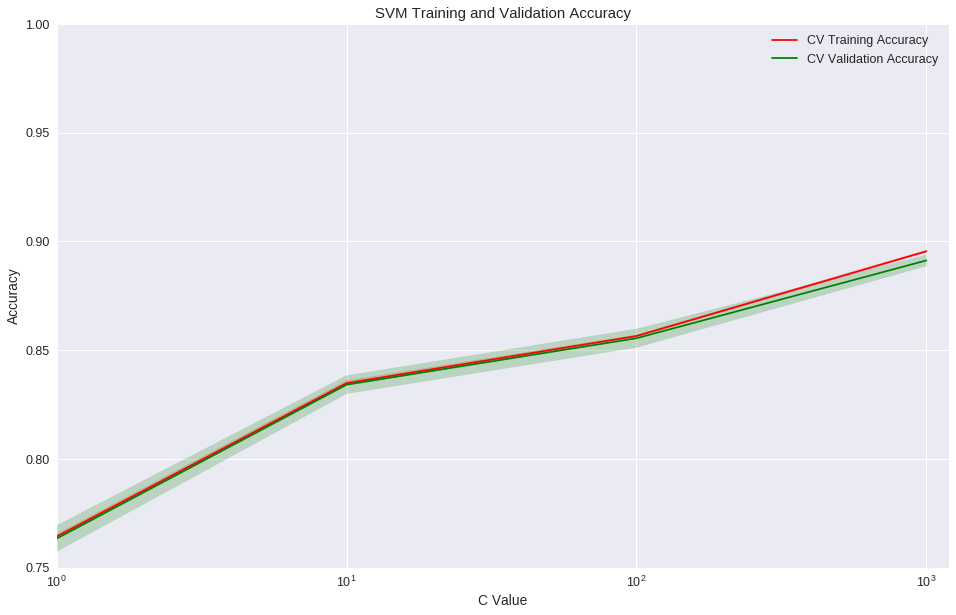

In [0]:
y_min = 0.75
y_max = 1.0

sn.set(font_scale = 1.25)
sn.set_style("darkgrid")
f = plt.figure(figsize = (16,10))
ax = plt.axes()
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.xlim(1, 1200)
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(Cs, train_scores_mean, label = "CV Training Accuracy", color = "red")
plt.fill_between(Cs, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha = 0.2, color = "red")
plt.semilogx(Cs, test_scores_mean, label = "CV Validation Accuracy", color = "green")
plt.fill_between(Cs, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha = 0.2, color = "green")
plt.legend(loc = "best")
plt.show()